# Loading track or track collection from files

*tracklib* permet de charger des données GPS depuis un ou plusieurs fichiers de type CSV, GPX et dont les géométries sont sous forme de coordonnées ou au format wkt. Le timestamp, s'il existe peut-être fourni en format texte ou en time unix, les *Analytic Features* (AF) peuvent être ou non chargées et on peut aussi filtrer les données à charger. Tout ceci en spécifiant les paramètres un à un ou en passant par un template.

Toutes les méthodes sont dans la classe *TrackReader* et les méthodes statiques suivant le format des données:
<br/>
<div class="alert alert-block alert-info" style="padding:1em">
    
```python
  tkl.TrackReader.readFromGpx(...)
  tkl.TrackReader.readFromCsv(...)
  tkl.TrackReader.readFromWkt(...)
```
</div>

<br/>
<b>Time field</b>
Le format du champ time peut être défini de différentes façons dans les fichiers CSV:

champ texte, on spécifie le format

```python
  ObsTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")
  ObsTime.setReadFormat("2D/2M/4Y 2h:2m:2s")
```

<br/>
<b>Crs field</b>

Pour les 3 méthodes d'import, vous pouvez préciser le type de coordonnées

geographic coordinates

```python
    srid="GeoCoords"
    # or
    srid = "GEO" 
```
    
or local projection (ENU or ENUCoords) 
```python
    srid="ENUCoords"
    # or
    srid="ENU"
```

## As usual, let's start by defining our environment

The first task is only useful for the online notebook and import the local tracklib code source. It's not necessary if tracklib is installed from PyPI.

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import tracklib library
import tracklib as tkl

The following two imports are necessary for the tutorial:

In [2]:
import os
import matplotlib.pyplot as plt

## Example for a GPX file

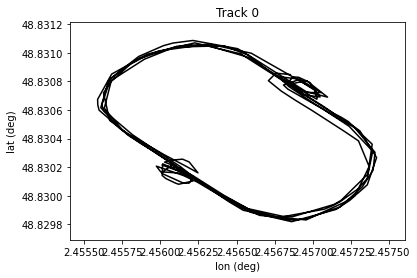

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")
resource_path = '../../../../data/gpx/'
filepath = os.path.join(resource_path, 'activity_5807084803.gpx')
tracks = tkl.TrackReader.readFromGpx(filepath)
tracks[0].plot()

## Example for a CSV file

- pas de champ time, -1 

    idT = -1

- Timestamp is in milliseconds

```python
    PATH = '/home/marie-dominique/DATA/GPX/MOPSI/0/'
    dateInitiale = '1970-01-01 00:00:00'
    collection = reader.readFromCsv(path=PATH, id_E=1, id_N=0, id_T=2, 
                                      srid="GeoCoords",
                                      DateIni = GPSTime.readTimestamp(dateInitiale),
                                      selector = s,
                                      separator = ' ', verbose = True)
```

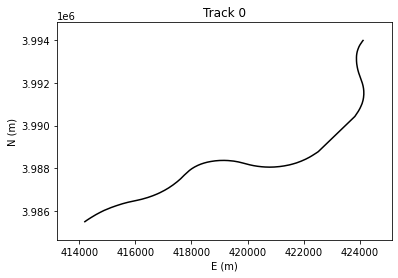

In [8]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
resource_path = '../../../../data'
filepath = os.path.join(resource_path, 'trace10_mm.dat')
track = tkl.TrackReader.readFromCsv(filepath, 2, 3, -1, 1, h=1)
track.plot()

## Example for a CSV file with a geometry structured in WKT 

track is associated with a linestring

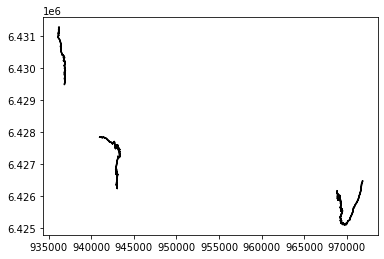

In [9]:
resource_path = '../../../../data/wkt'
csvpath = os.path.join(resource_path, 'iti.wkt')
TRACES = tkl.TrackReader.readFromWkt(csvpath, id_geom=0, separator="#", h=1, doublequote=True)
TRACES.plot('k-')

## If you have a list of CVS files in a folder

In [10]:
tkl.ObsTime.setReadFormat("2D/2M/4Y 2h:2m:2s")
resource_path = '../../../../data/test/csv'
collection = tkl.TrackReader.readFromCsv(resource_path, 1, 2, -1, -1)
print (collection.size(), ' CSV tracks loaded')

2  CSV tracks loaded


## If you have a list of GPX files in a folder

In [11]:
resource_path = '../../../../data/gpx/geo'
tkl.ObsTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")
tracks = tkl.TrackReader.readFromGpx(resource_path)
print (collection.size(), ' GPX tracks loaded')

2  GPX tracks loaded


## Loading tracks with Analytical Features

If the CVS file contains AF, to load all of them 

    ObsTime.setReadFormat("2D/2M/4Y 2h:2m:2s")
    chemin = os.path.join(self.resource_path, 'data/test/ecrins_interpol4.csv')
    track = TrackReader.readFromCsv(chemin, 0, 1, 2, 3, separator=";",read_all=True)


* Select tracks inside a defined bounding box


Load a track collection by specifying and a directory in the variable 'path'.
Timestamp is in milliseconds. Select only tracks inside a defined bounding box 
   
   
    from tracklib.io.TrackReader import TrackReader as reader
    from tracklib.core.GPSTime import GPSTime
    from tracklib.core.Coords import ENUCoords
    import tracklib.algo.Geometrics as Geometrics
    from tracklib.algo.Selection import Constraint
    from tracklib.algo.Selection import TYPE_CUT_AND_SELECT, MODE_INSIDE
    from tracklib.algo.Selection import Selector   
   
    Xmin = 29.72
    Xmax = 29.77
    Ymin = 62.585
    Ymax = 62.615

    ll = ENUCoords(Xmin, Ymin)
    ur = ENUCoords(Xmax, Ymax)
    bbox = Geometrics.Rectangle(ll, ur)

    constraintBBox = Constraint(shape = bbox, mode = MODE_INSIDE, type=TYPE_CUT_AND_SELECT)
    s = Selector([constraintBBox])

    PATH = '/home/marie-dominique/DATA/GPX/MOPSI/0/'
    GPSTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
    dateInitiale = '1970-01-01 00:00:00'
    collection = reader.readFromCsv(path=PATH, id_E=1, id_N=0, id_T=2, 
                                    srid="GeoCoords",
                                    DateIni = GPSTime.readTimestamp(dateInitiale),
                                    selector = s,
                                    separator = ' ', verbose = True)






## Template

First, it is necessary to define the template in resources/track_file_format

    RTKLIB    , pos, 2, 1, 3, 0, -1, bb, 1, %, -999999, GEO, 4Y/2M/2D 2h:2m:2s.3z, FALSE


Then to load the file 

    resource_path = '/home/glagaffe/tracklib/data/'
    csvpath = os.path.join(resource_path, 'raw_gps.pos')
    gps = TrackReader.readFromCsv(csvpath, "RTKLIB") 
    print (gps.size())